In [ ]:
"""
Programmed by Ardavan Modarres
ardavan.modarres@email.kntu.ac.ir
* 2022-03-05: Initial coding
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Generating Data

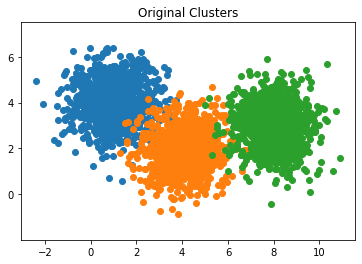

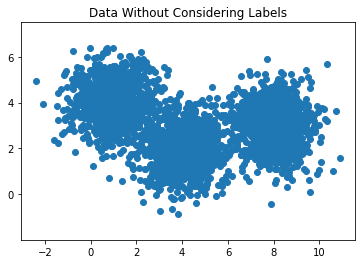

In [8]:
N = 1000
# data generation
mean1 = [1, 4]
cov1 = [[0.8, 0], [0, 0.8]]  # diagonal covariance
x1 = np.random.multivariate_normal(mean1, cov1, N)

mean2 = [4, 2]
cov2 = [[0.8, 0], [0, 0.8]]  # diagonal covariance
x2 = np.random.multivariate_normal(mean2, cov2, N)

mean3 = [8, 3]
cov3 = [[0.8, 0], [0, 0.8]]  # diagonal covariance
x3 = np.random.multivariate_normal(mean3, cov3, N)

x = np.concatenate((x1, x2, x3), axis=0)

plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.scatter(x3[:, 0], x3[:, 1])
plt.axis('equal')
plt.title('Original Clusters')
plt.show()

plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.title('Data Without Considering Labels')
plt.show()

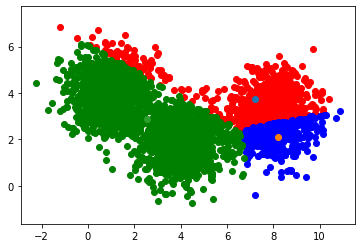

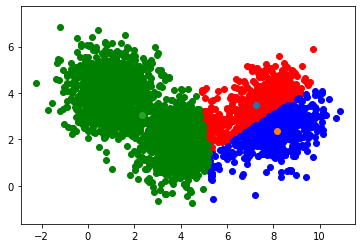

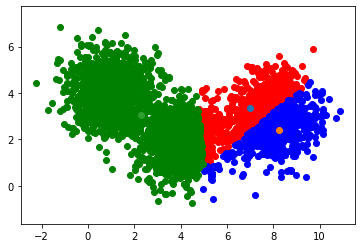

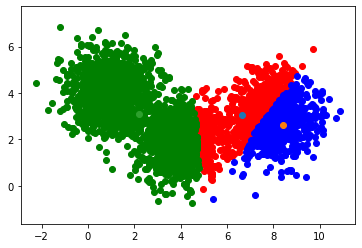

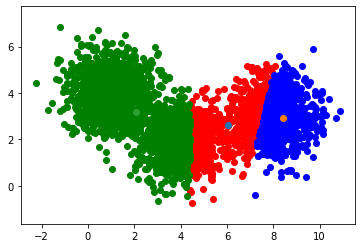

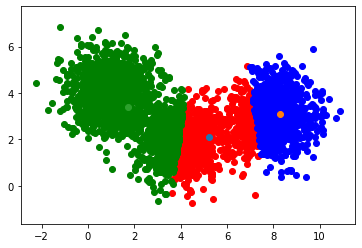

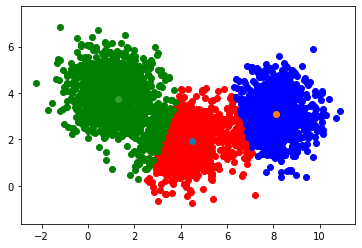

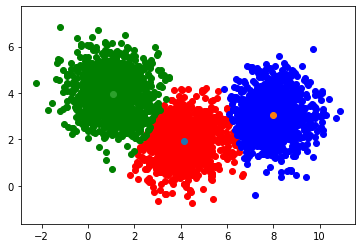

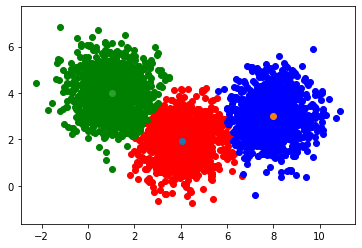

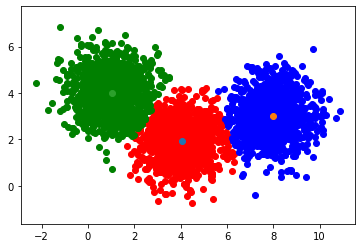

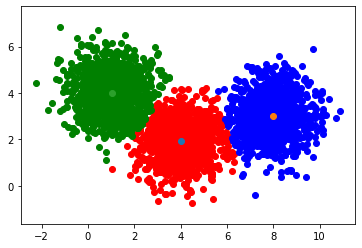

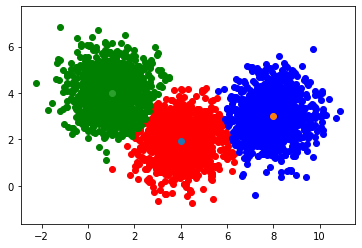

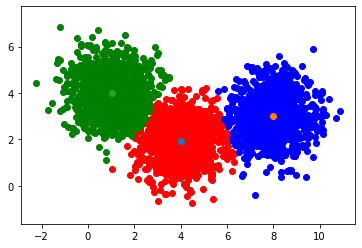

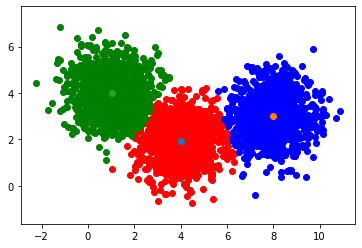

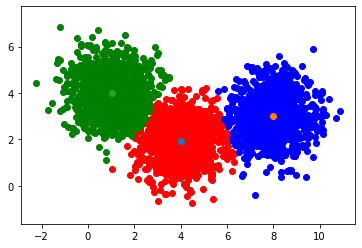

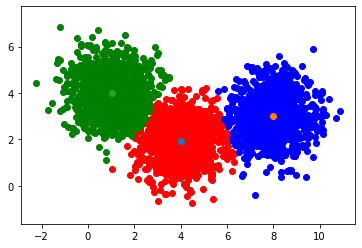

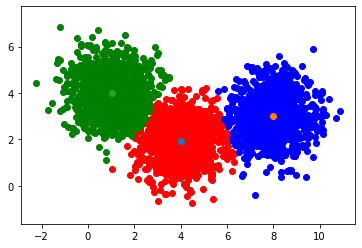

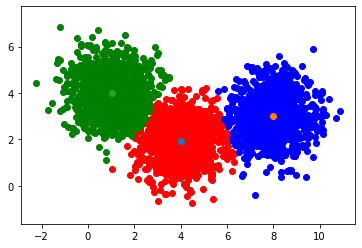

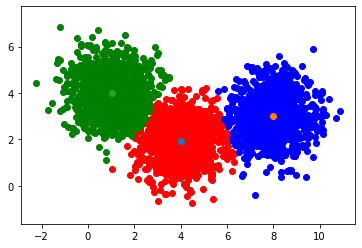

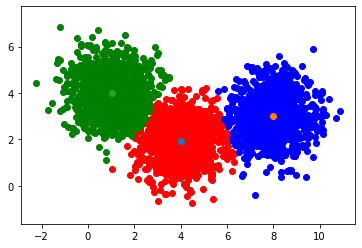

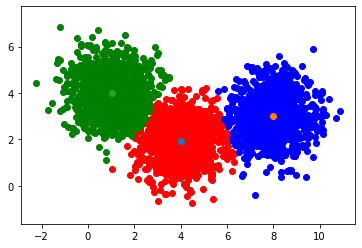

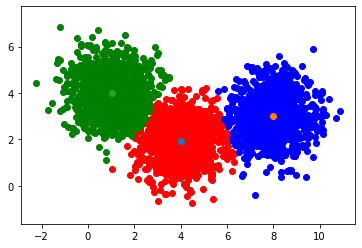

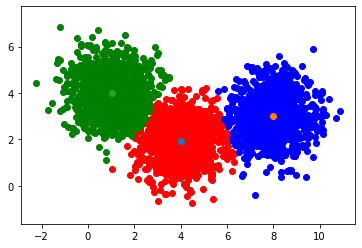

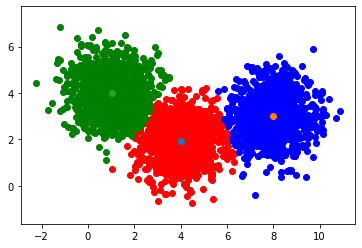

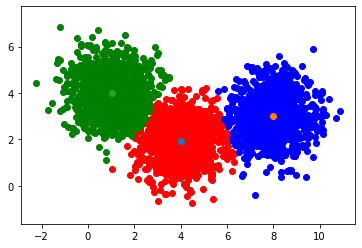

In [5]:
# OOP K-MEANS Implementation
class KMEANS:
    def __init__(self):
        pass
    
    def initialize_centers_randomly(self, k):
        '''center initialization completly random'''
        centers = np.random.normal(4, 2, size=(k, 2))
        return centers
    
    def initialize_centers_from_data(self, data, k):
        '''center initialization such that data centers is chosen using data'''
        center_idxs = np.random.randint(data.shape[0], size=k)
        centers = data[center_idxs, :]
        return centers
    
    def cluster_assignment(self, data, centers, k):
        '''this function finds the nearest center for each sample
            and assign the sample to the corresponding cluster'''
        clusters = [[] for _ in range(k)]
        for i in range(data.shape[0]):
            c = np.argmin(np.sqrt(np.sum((data[i] - centers)**2, axis = 1)))
            clusters[c].append(data[i])
        return clusters
    
    def update_centers(self, clusters, centers, k):
        '''this function updates the centroids of each cluster by computing
           the mean of all samples assigned to the corresponding cluster'''
        for i in range(k):
            centers[i] = np.mean(np.asarray(clusters[i]), axis=0)
        return centers
    
    def fit(self, data, num_epochs, k=3):
        '''this function iteratively cluster the data, and updates the centers'''
        centers = self.initialize_centers_from_data(data, k)
        for epoch in range(num_epochs):
            clusters = self.cluster_assignment(data, centers, k)
            centers = self.update_centers(clusters, centers, k)
            self.visualize(clusters, centers)

    def visualize(self, clusters, centers):
        '''this function plots a scatter plot of data and corresponding centroids'''
        plt.scatter(np.asarray(clusters[0])[:, 0], np.asarray(clusters[0])[:, 1], color = "red")
        plt.scatter(np.asarray(clusters[1])[:, 0], np.asarray(clusters[1])[:, 1], color = "blue")
        plt.scatter(np.asarray(clusters[2])[:, 0], np.asarray(clusters[2])[:, 1], color = "green")
        plt.scatter(centers[0, 0], centers[0, 1],)
        plt.scatter(centers[1, 0], centers[1, 1],)
        plt.scatter(centers[2, 0], centers[2, 1],)
        plt.axis('equal')
        plt.show()
        
kmeans = KMEANS()
kmeans.fit(x, 25)